# Week 3 Assignment 4
##### Georgia  - Team 5

#### The dataset, collected by Davis et al in the 1930s, shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise. http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis

#### Goal: Make inferences about the relationships between (1) the women, and (2) the social events. 

### Import data from url and rearrange it to look like a matrix

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import graphlab as gl
graphlab.canvas.set_target('ipynb')
%matplotlib inline


In [217]:
rows = pd.read_table("http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat", skiprows= 3, skipfooter = 34, header = 0)

C:\Users\Georgia\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [218]:
columns = pd.read_table("http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat", skiprows= 22, skipfooter = 19, header = 0)
newcolumns = columns.T

C:\Users\Georgia\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [224]:
data = pd.read_table("http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat", skiprows=38,
                     names = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13"], delim_whitespace = True)
data.columns = newcolumns.iloc[0]
data.index = rows
data

COLUMN LABELS:,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
"(EVELYN,)",1,1,1,1,1,1,0,1,1,0,0,0,0,0
"(LAURA,)",1,1,1,0,1,1,1,1,0,0,0,0,0,0
"(THERESA,)",0,1,1,1,1,1,1,1,1,0,0,0,0,0
"(BRENDA,)",1,0,1,1,1,1,1,1,0,0,0,0,0,0
"(CHARLOTTE,)",0,0,1,1,1,0,1,0,0,0,0,0,0,0
"(FRANCES,)",0,0,1,0,1,1,0,1,0,0,0,0,0,0
"(ELEANOR,)",0,0,0,0,1,1,1,1,0,0,0,0,0,0
"(PEARL,)",0,0,0,0,0,1,0,1,1,0,0,0,0,0
"(RUTH,)",0,0,0,0,1,0,1,1,1,0,0,0,0,0
"(VERNE,)",0,0,0,0,0,0,1,1,1,0,0,1,0,0


In [279]:
df = data.stack().reset_index()
df.columns = ['Name','Event','Value']
df = df[df.Value != 0]
df.head()

,Name,Event,Value
0,"(EVELYN,)",E1,1
1,"(EVELYN,)",E2,1
2,"(EVELYN,)",E3,1
3,"(EVELYN,)",E4,1
4,"(EVELYN,)",E5,1


# So far, this is where I'm stuck (trying to add edges onto the plot below)

In [297]:
G = nx.Graph()
G.add_nodes_from(df.Name)

G.add_edges_from([df.Name,df.Event])

NetworkXError: Edge tuple 0       (EVELYN,)
1       (EVELYN,)
2       (EVELYN,)
3       (EVELYN,)
4       (EVELYN,)
5       (EVELYN,)
7       (EVELYN,)
8       (EVELYN,)
14       (LAURA,)
15       (LAURA,)
16       (LAURA,)
18       (LAURA,)
19       (LAURA,)
20       (LAURA,)
21       (LAURA,)
29     (THERESA,)
30     (THERESA,)
31     (THERESA,)
32     (THERESA,)
33     (THERESA,)
34     (THERESA,)
35     (THERESA,)
36     (THERESA,)
42      (BRENDA,)
44      (BRENDA,)
45      (BRENDA,)
46      (BRENDA,)
47      (BRENDA,)
48      (BRENDA,)
49      (BRENDA,)
          ...    
174     (SYLVIA,)
175     (SYLVIA,)
176     (SYLVIA,)
177     (SYLVIA,)
179     (SYLVIA,)
180     (SYLVIA,)
181     (SYLVIA,)
187       (NORA,)
188       (NORA,)
190       (NORA,)
191       (NORA,)
192       (NORA,)
193       (NORA,)
194       (NORA,)
195       (NORA,)
202      (HELEN,)
203      (HELEN,)
205      (HELEN,)
206      (HELEN,)
207      (HELEN,)
208      (HELEN,)
209      (HELEN,)
217    (DOROTHY,)
218    (DOROTHY,)
219    (DOROTHY,)
221    (DOROTHY,)
232     (OLIVIA,)
234     (OLIVIA,)
246      (FLORA,)
248      (FLORA,)
Name: Name, dtype: object must be a 2-tuple or 3-tuple.

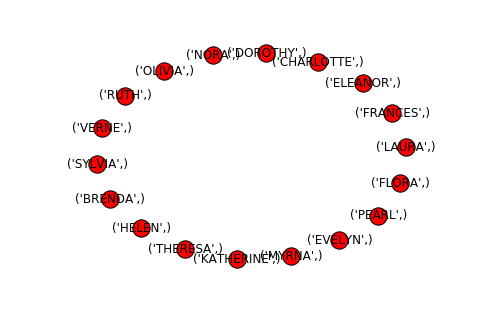

In [298]:
nx.draw(G,with_labels=True)
plt.show()